In [1]:
# Run this cell to ensure your environment is setup correctly
%pip install -r ../requirements.txt
%pip install --upgrade scikit-learn threadpoolctl

import os

os.environ['OMP_NUM_THREADS'] = '3'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Question 1: Import the following libraries, including their `as` aliases: pandas, numpy, matplotlib (pyplot) and seaborn.
import ___ as ___
import ___ as ___
import ___ as ___
import ___ as ___

In [3]:
# Question 2.0: Read the "QSR final dataset.xlsx" file into a pandas dataframe called `df`. 
# Question 2.1: Set the index column to be the ID column.
# NOTE: The "Unnamed: 0" column is a duplicate of the ID column, we've dropped it for you here. This is an Excel artifact.
# Question 2.2: View the first 5 rows of the dataframe.

df = ___ # 2.0, 2.1
df.drop('Unnamed: 0', axis=1, inplace=True)
___ # 2.2

,Zip.code,Gender,Marital,academic,Age,num.month,favorite.QSR,num.people,appealing,seat,...,drive..tru,discounts,healthy.food,menu,last.visit,visit.again,recommend,Profession,Information.Source,Professional
ID,,,,,,,,,,,,,,,,,,,,,
1,72830.0,2,2,4,2,6,BURGER KING,1,3,3,...,4,4,4,4,5,4,4,Student,multiple.way,NaN
2,72845.0,2,2,4,1,28,BURGER KING,1,2,5,...,3,2,2,3,3,4,4,Student,drive,NaN
3,72560.0,1,2,3,1,15,MCDONALD'S,1,3,3,...,5,4,2,5,5,5,4,Student,sign,NaN
4,71935.0,1,3,3,1,4,SONIC,2,4,5,...,5,5,2,5,5,5,5,Student,other,NaN
5,72745.0,2,2,3,1,4,TACO BELL,1,5,4,...,5,3,4,5,5,5,5,Student,drive,NaN


In [4]:
# Question 3: Fill in the missing values in the dataframe with 0, but only for the numerical columns.
# Hint: loop through the dataframe's columns, if a column's data type is 'int64' or 'float64', then set the missing values to 0.
for ___ in df.___:
    if df[___].___ == ___ or df[___].___ == ___:
        df[___] = ___

#### Feature Engineering

In [5]:
# Question 4: Complete the `calculate_total_score` function below based on the documentation string provided:
# HINT: Use `axis=1` to calculate the total score for each row, not each column.
def calculate_total_score():
    """
    Calculates the total score for each row in the dataframe, based on the columns passed in.

    Args:
        `df (pandas.DataFrame)`: The dataframe to calculate the total score for.
        `start_col_name (str)`: The name of the column to start the calculation from.
        `end_col_name (str)`: The name of the column to end the calculation at.

    Returns:
        pandas.DataFrame: The dataframe with the column 'Total Score' added.

    Example:
        >>> df = pandas.DataFrame({'appealing': [1, 2, 3], 'visit again': [4, 5, 6]})
        >>> df = calculate_total_score(df, 'appealing', 'visit again')
        >>> df.head()
              appealing  visit again  Total Score
        0         1            4            5
        1         2            5            7
        2         3            6            9
    """
    df['Total Score'] = df.loc[___, ___].___
    return df

df = calculate_total_score(df, 'appealing', 'visit.again')

#### Exploratory Data Analysis

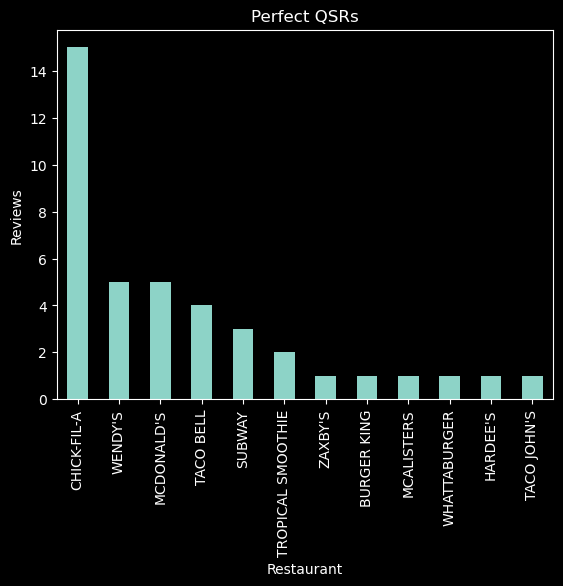

In [6]:
# Question 5: Create a Matplotlib bar figure of the restaurants with perfect scores (125) and how many reviews they have.
perfect_df = df.loc[___]
perfect_df['favorite.QSR'].___.___

plt.title('Perfect QSRs')
plt.xlabel('Restaurant')
plt.ylabel('Reviews')
plt.show()

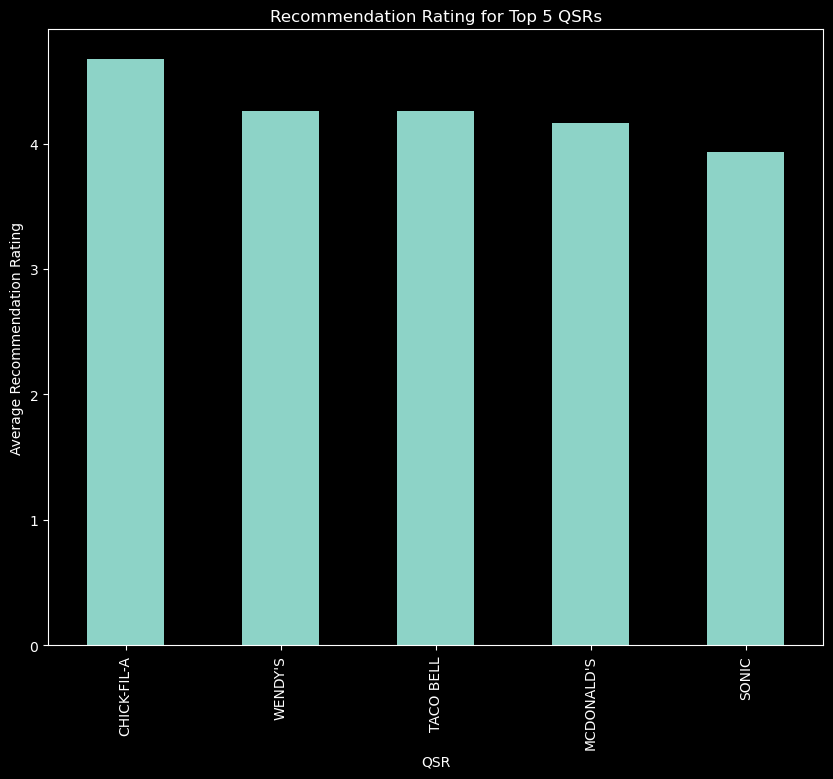

In [7]:
# Question 6: Create another Matplotlib bar figure of the top 5 most picked restaurants and their average recommendation rating.
top_df = df['favorite.QSR'].___.head()
top_df = df[df['favorite.QSR'].isin(top_df.index)]
top_df.groupby('favorite.QSR')['___'].mean().sort_values(ascending=False).___

plt.title('Recommendation Rating for Top 5 QSRs')
plt.xlabel('QSR')
plt.ylabel('Average Recommendation Rating')
plt.show()

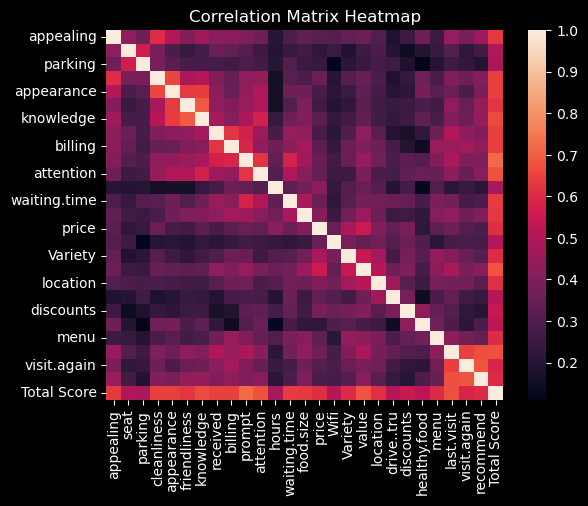

In [8]:
# Question 7: Using the following correlated columns, create a correlation matrix heatmap of the dataset.
corr_columns = ['appealing',
       'seat', 'parking', 'cleanliness', 'appearance', 'friendliness',
       'knowledge', 'received', 'billing', 'prompt', 'attention', 'hours',
       'waiting.time', 'food.size', 'price', 'Wifi', 'Variety', 'value',
       'location', 'drive..tru', 'discounts', 'healthy.food', 'menu',
       'last.visit', 'visit.again', 'recommend', 'Total Score']

feature_df = pd.DataFrame()

for ___ in corr_columns:
       feature_df[___] = df[___]
       corr_matrix = ___.corr()

fig, ax = plt.subplots()
sns.heatmap(___, annot=False)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Modeling

In [9]:
from sklearn.cluster import KMeans

In [10]:
# Question 8: Put 'Total Score' and 'recommend' into a list called relevant_features:
___ = [___, ___]

# Question 8.1: Set X equal to the values of the relevant_features in the dataframe:
X = df[___].___

results = []

# Question 8.2:
# Write a loop that runs through the range of 1-10 (which represents the amount of clusters)
# and fits the data in X to KMeans for each amount of cluster between 1-10.
for i in range(1,11):
    kmeans = KMeans(n_clusters=___, init="k-means++", random_state=42, n_init='auto')
    kmeans.___
    # NOTE: inertia_ is the formula used to segregate the data points into clusters
    results.append(kmeans.inertia_)

# Question 8.3: Plot the results list against the range of 1-10.
plt.plot(range(1,11), ___)
# Notice the plot's elbow at 3 clusters, this is the optimal amount of clusters for this dataset.

In [14]:
# Question 9: Create a KMeans model with 3 clusters, using the following parameters:
model = ___(n_clusters=___, init='k-means++', random_state=42, n_init='auto')

# Question 9.1: Fit the model and make predictions against the data in X:
y = model.___(___)

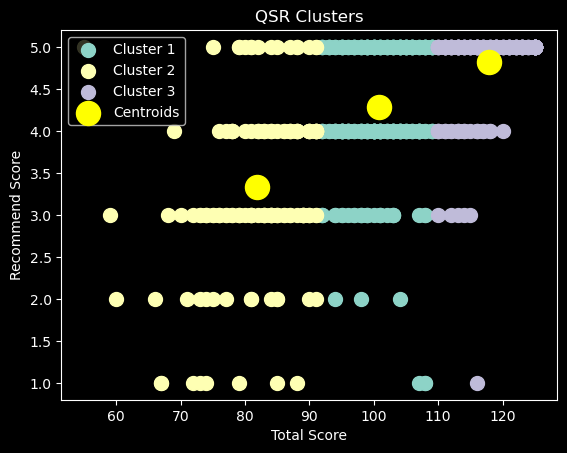

In [13]:
num_clusters = len(np.unique(y))

for cluster in range(num_clusters):
    plt.scatter(X[y == cluster, 0], X[y == cluster, 1], s=100, label=f'Cluster {cluster+1}')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('QSR Clusters')
plt.xlabel('Total Score')
plt.ylabel('Recommend Score')
plt.legend()
plt.show()